In [11]:
import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

In [12]:
from sklearn.cluster import estimate_bandwidth, MeanShift

path = r'img_1.png'
img = cv.imread(path)
img = cv.medianBlur(img, 3)

In [13]:
flat_image = img.reshape((-1,3))
flat_image = np.float32(flat_image)

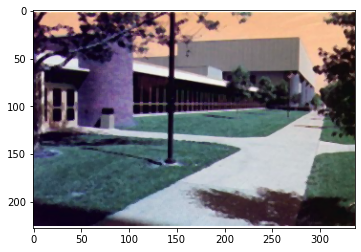

In [14]:
imgplot = plt.imshow(img)

In [15]:
bandwidth = estimate_bandwidth(flat_image, quantile=.06, n_samples=3000)
print(bandwidth)
ms = MeanShift(bandwidth = bandwidth, max_iter=800, bin_seeding=True)
ms.fit(flat_image)

23.22511717572314


MeanShift(bandwidth=23.22511717572314, bin_seeding=True, max_iter=800)

In [16]:
ms.fit(flat_image)
labeled=ms.labels_

In [17]:
segments = np.unique(labeled)
print('Number of segments: ', segments.shape[0])

Number of segments:  12


In [18]:
total = np.zeros((segments.shape[0], 3), dtype=float)
count = np.zeros(total.shape, dtype=float)
for i, label in enumerate(labeled):
    total[label] = total[label] + flat_image[i]
    count[label] += 1
avg = total/count
avg = np.uint8(avg)

In [19]:
res = avg[labeled]
result = res.reshape((img.shape))

# show the result
cv.imshow('result',result)
cv.waitKey(0)
cv.destroyAllWindows()